# For this example, we'll use TIC 261136679 (Pi Mensae c, https://arxiv.org/pdf/1809.05967.pdf)

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import astroquery
from astroquery.mast import Observations

# This is a helper function to get High Level Science Products (HLSP) from MAST
# Some example sources for FFI light curves are from SPOC and QLP
# a full list of FFI sources can be found from the HLSP MAST page at 
# https://archive.stsci.edu/hlsp/

In [39]:


def hlsp(ticid, sector, author="tess-spoc"):
    """
    
    Parameters
    ----------
    ticid : int
        DESCRIPTION.
    sector : int
        Sector of observations to vet
    author : string, OPTIONAL
        options include are the nicknames of the HSLPs (example: 'QLP', 'DIAmante','CDIPs','PATHOS','TASOC',etc.
        The default is "tess-spoc".
    Returns
    -------
    lc : lightkurve object
        lightkurve object of the data requested.
    """
    
    #print(f'TIC {ticid}')
    import lightkurve as lk
    
    lc = lk.search_lightcurve('TIC '+str(ID), sector=sector,
                              cadence="ffi",author=author).download()
    
    return lc

In [4]:
# import lightkurve as lk
# from lightkurve import search_lightcurvefile
# lk.search_lightcurvefile('TIC '+str(ID),mission='TESS',cadence='long',sector=1)

In [6]:
lc=hlsp(ID, sector=1, author="tess-spoc")

In [13]:
lc.columns

<TableColumns names=('time','flux','flux_err','timecorr','cadenceno','centroid_col','centroid_row','sap_flux','sap_flux_err','sap_bkg','sap_bkg_err','pdcsap_flux','pdcsap_flux_err','quality','psf_centr1','psf_centr1_err','psf_centr2','psf_centr2_err','mom_centr1','mom_centr1_err','mom_centr2','mom_centr2_err','pos_corr1','pos_corr2')>

In [20]:
print('cadence check (in minutes, converted from days): ',np.nanmedian(np.diff(lc.time.value)) * 24*60)

cadence check (in minutes, converted from days):  29.9995103909896


<ipython-input-30-a7d4045be232>:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


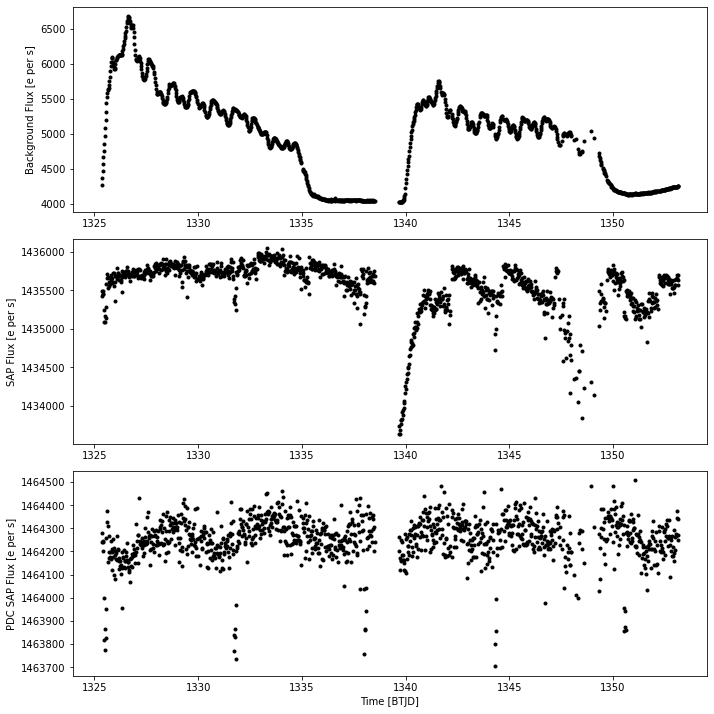

In [30]:
fig=plt.figure(figsize=(10,10))
ax1=fig.add_subplot(311)
ax2=fig.add_subplot(312)
ax3=fig.add_subplot(313)

ax1.ticklabel_format(useOffset=False, style='plain')
ax2.ticklabel_format(useOffset=False, style='plain')
ax3.ticklabel_format(useOffset=False, style='plain')

ax1.plot(lc.time.value, lc.sap_bkg.value,'k.')
ax2.plot(lc.time.value, lc.sap_flux.value,'k.')
ax3.plot(lc.time.value, lc.pdcsap_flux.value,'k.')

ax1.set_ylabel('Background Flux [e per s]')
ax2.set_ylabel('SAP Flux [e per s]')
ax3.set_ylabel('PDC SAP Flux [e per s]')

ax3.set_xlabel('Time [BTJD]')
fig.tight_layout(pad=1)
fig.show()


<ipython-input-31-9a36b817b2a7>:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


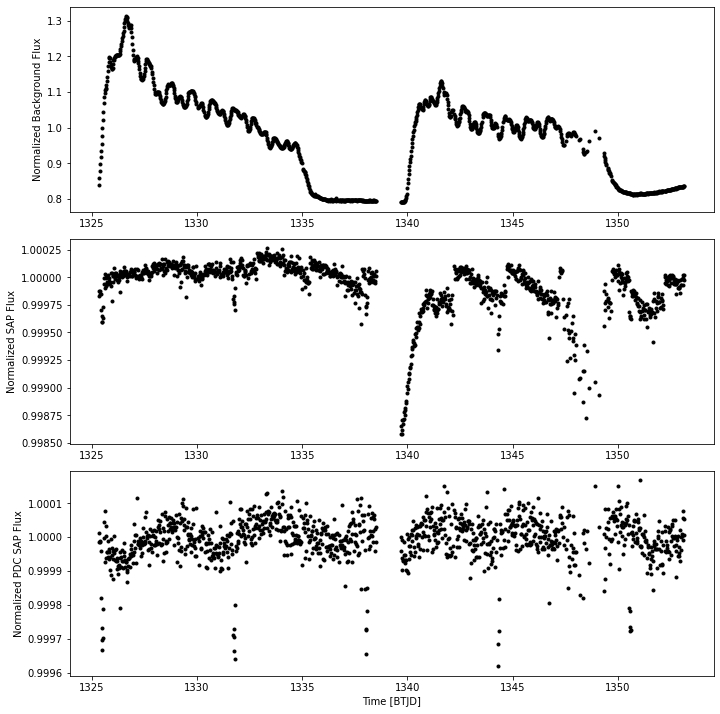

In [31]:

# we can normalize the flux units for another visual comparison

fig=plt.figure(figsize=(10,10))
ax1=fig.add_subplot(311)
ax2=fig.add_subplot(312)
ax3=fig.add_subplot(313)

ax1.ticklabel_format(useOffset=False, style='plain')
ax2.ticklabel_format(useOffset=False, style='plain')
ax3.ticklabel_format(useOffset=False, style='plain')

ax1.plot(lc.time.value, lc.sap_bkg.value/np.nanmedian(lc.sap_bkg.value),'k.')
ax2.plot(lc.time.value, lc.sap_flux.value/np.nanmedian(lc.sap_flux.value),'k.')
ax3.plot(lc.time.value, lc.pdcsap_flux.value/np.nanmedian(lc.pdcsap_flux.value),'k.')

ax1.set_ylabel('Normalized Background Flux')
ax2.set_ylabel('Normalized SAP Flux')
ax3.set_ylabel('Normalized PDC SAP Flux')

ax3.set_xlabel('Time [BTJD]')
fig.tight_layout(pad=1)
fig.show()

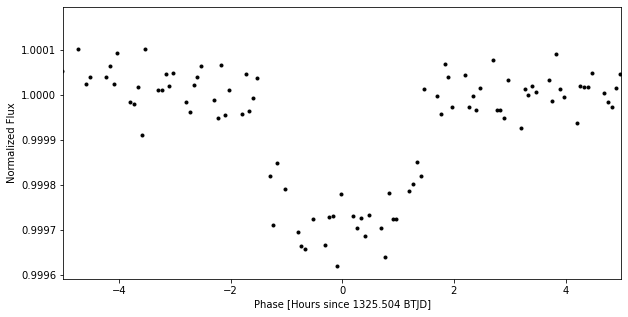

In [33]:
# how does it look phasefolded?

def phasefold(T0,time,period,flux):
    phase=(time- T0 + 0.5*period) % period - 0.5*period        
    ind=np.argsort(phase, axis=0)
    return phase[ind],flux[ind]


#from Chelsea Huang's paper (for planet Pi Mensae c):
TC = 2458325.50400 - 2457000 #converted from BJD to BTJD
P = 6.2679 # days

pf, ff = phasefold(TC,lc.time.value, P, lc.pdcsap_flux.value/np.nanmedian(lc.pdcsap_flux.value))

fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot(111)
ax.ticklabel_format(useOffset=False, style='plain')
ax.plot(24*pf,ff,'k.')
ax.set_xlim(-5,5) #limit phase window to +/- 5 hours from transit center time (TC)
ax.set_ylabel('Normalized Flux')
ax.set_xlabel('Phase [Hours since '+str(np.round(TC,5))+' BTJD]')
plt.show()



# we can also compare to QLP's FFI light curve (which I think was used in Chelsea Huang's paper)

<TableColumns names=('time','flux','flux_err','cadenceno','sap_flux','kspsap_flux','kspsap_flux_err','quality','orbitid','sap_x','sap_y','sap_bkg','sap_bkg_err','kspsap_flux_sml','kspsap_flux_lag')>


<ipython-input-40-12b0a4e3d30f>:26: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


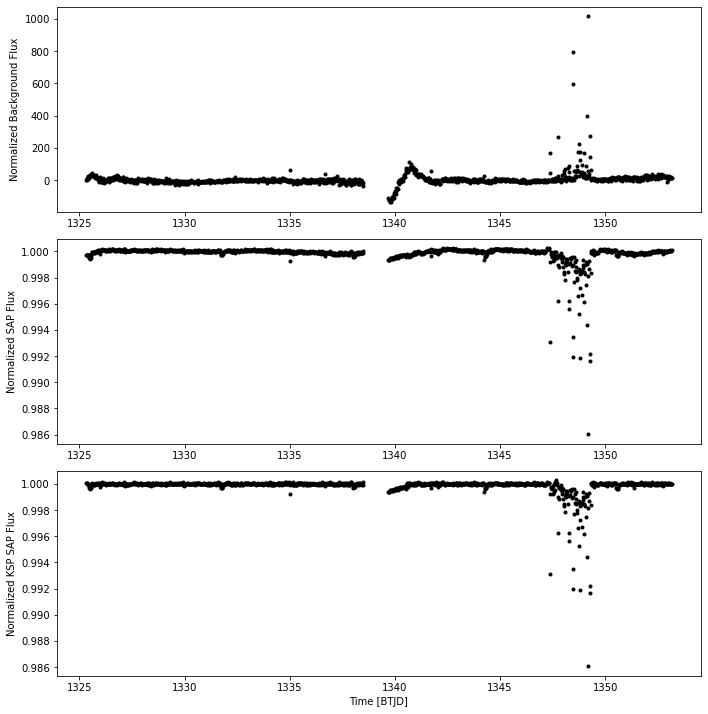

In [40]:
qlplc=hlsp(ID, sector=1, author="QLP")
print(qlplc.columns)


# we can normalize the flux units for another visual comparison

fig=plt.figure(figsize=(10,10))
ax1=fig.add_subplot(311)
ax2=fig.add_subplot(312)
ax3=fig.add_subplot(313)

ax1.ticklabel_format(useOffset=False, style='plain')
ax2.ticklabel_format(useOffset=False, style='plain')
ax3.ticklabel_format(useOffset=False, style='plain')

ax1.plot(qlplc.time.value, qlplc.sap_bkg.value/np.nanmedian(qlplc.sap_bkg.value),'k.')
ax2.plot(qlplc.time.value, qlplc.sap_flux.value/np.nanmedian(qlplc.sap_flux.value),'k.')
ax3.plot(qlplc.time.value, qlplc.kspsap_flux.value/np.nanmedian(qlplc.kspsap_flux.value),'k.')

ax1.set_ylabel('Normalized Background Flux')
ax2.set_ylabel('Normalized SAP Flux')
ax3.set_ylabel('Normalized KSP SAP Flux')

ax3.set_xlabel('Time [BTJD]')
fig.tight_layout(pad=1)
fig.show()

In [44]:

mnotzero = np.where(qlplc.quality.value!=0)[0]
mzero = np.where(qlplc.quality.value==0)[0]
print('number of non zero quality flags',len(mnotzero))
print('number of zero quality flags',len(mzero))

number of non zero quality flags 273
number of zero quality flags 993


<ipython-input-45-fc0caf708a86>:27: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


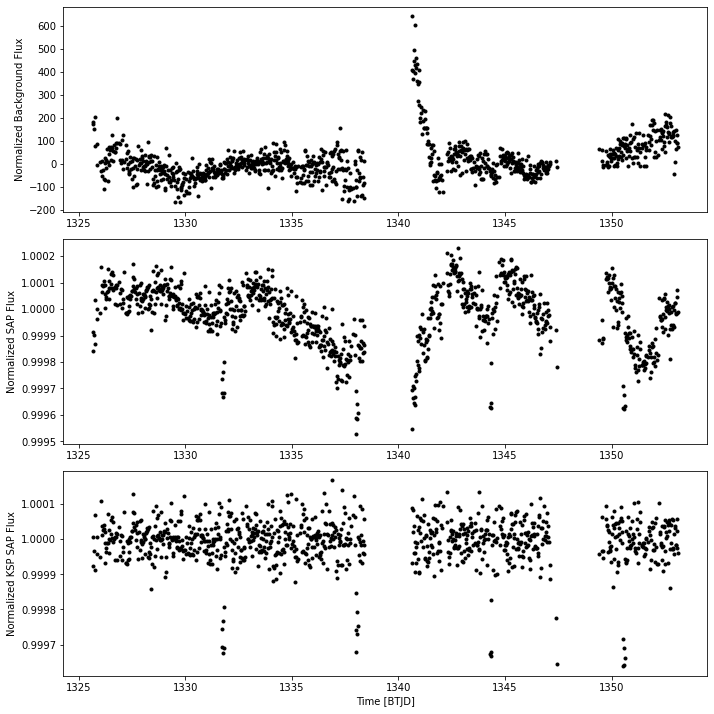

In [45]:
# same light curve but using quality==0 points only

qlpT, qlpBKG, qlpSAP, qlpKSPSAP = qlplc.time.value[mzero], qlplc.sap_bkg.value[mzero], qlplc.sap_flux[mzero], qlplc.kspsap_flux.value[mzero]

fig=plt.figure(figsize=(10,10))
ax1=fig.add_subplot(311)
ax2=fig.add_subplot(312)
ax3=fig.add_subplot(313)

ax1.ticklabel_format(useOffset=False, style='plain')
ax2.ticklabel_format(useOffset=False, style='plain')
ax3.ticklabel_format(useOffset=False, style='plain')




ax1.plot(qlpT, qlpBKG/np.nanmedian(qlpBKG),'k.')
ax2.plot(qlpT, qlpSAP/np.nanmedian(qlpSAP),'k.')
ax3.plot(qlpT, qlpKSPSAP/np.nanmedian(qlpKSPSAP),'k.')

ax1.set_ylabel('Normalized Background Flux')
ax2.set_ylabel('Normalized SAP Flux')
ax3.set_ylabel('Normalized KSP SAP Flux')

ax3.set_xlabel('Time [BTJD]')
fig.tight_layout(pad=1)
fig.show()

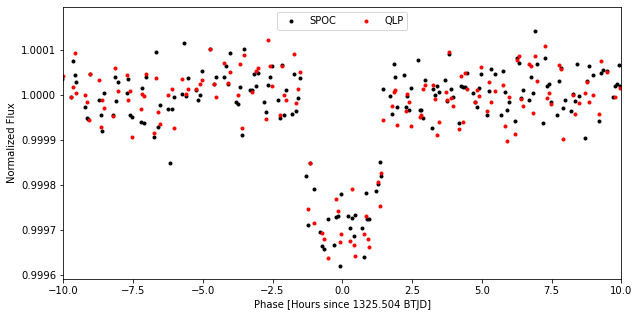

In [47]:
#let's compare phasefolded LCs

qlppf, qlpff = phasefold(T0, qlpT, P, qlpKSPSAP/np.nanmedian(qlpKSPSAP))

fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot(111)
ax.ticklabel_format(useOffset=False, style='plain')
ax.plot(24*pf,ff,'k.',label = 'SPOC')
ax.plot(24*qlppf,qlpff,'r.',label= 'QLP')
ax.set_xlim(-10,10) #limit phase window to +/- 5 hours from transit center time (TC)
ax.set_ylabel('Normalized Flux')
ax.set_xlabel('Phase [Hours since '+str(np.round(TC,5))+' BTJD]')
ax.legend(loc='upper center',ncol=2)
plt.show()

# they both look great! (as expected by teams of smarties from NASA/MIT)